Replogle JM, et al. Combinatorial single-cell CRISPR screens by direct guide RNA capture and targeted sequencing. Nat Biotechnol 2020 388. 2020 Mar 30;38(8):954–61.

In [1]:
source('./data_processing.R')

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# sgRNAcs2

GSM4367981	exp3: UPR 3' sgRNAcs2

In [3]:
input_dir = './GiRAFR_outputs/Replogle_NatureBiotechnology/sample1/'
output_dir = './figures_results/Replogle_NatureBiotechnology/sample1'

## All UMI profile

[1] "Number of mutant UMI"
[1] "Processed cell number: 7558"
[1] "Wildtype UMI: 100594"
[1] "Mutant UMI: 540615"


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


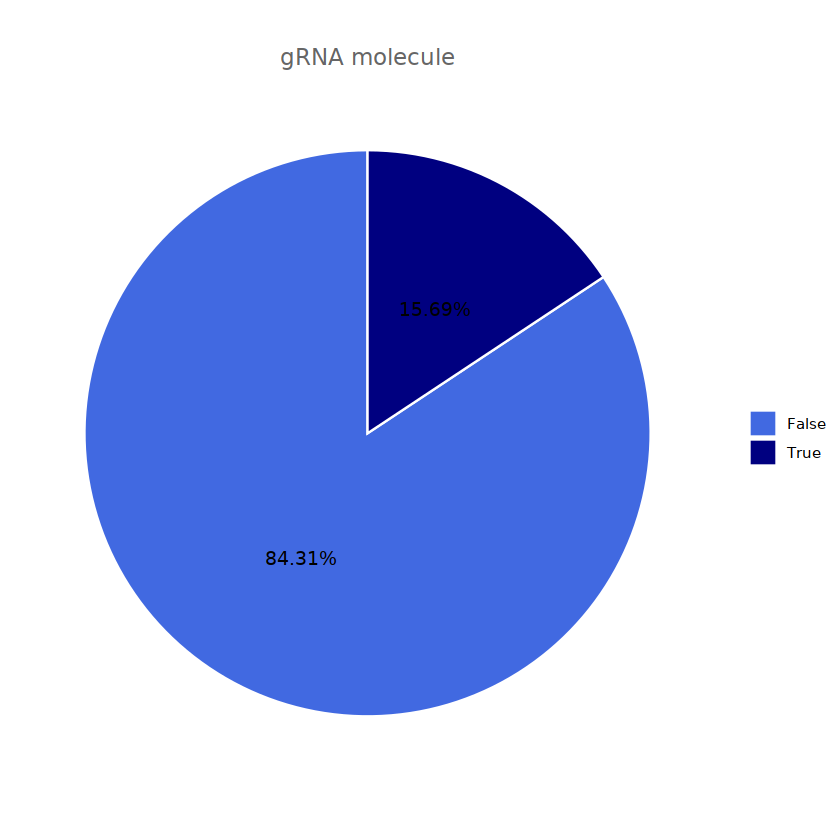

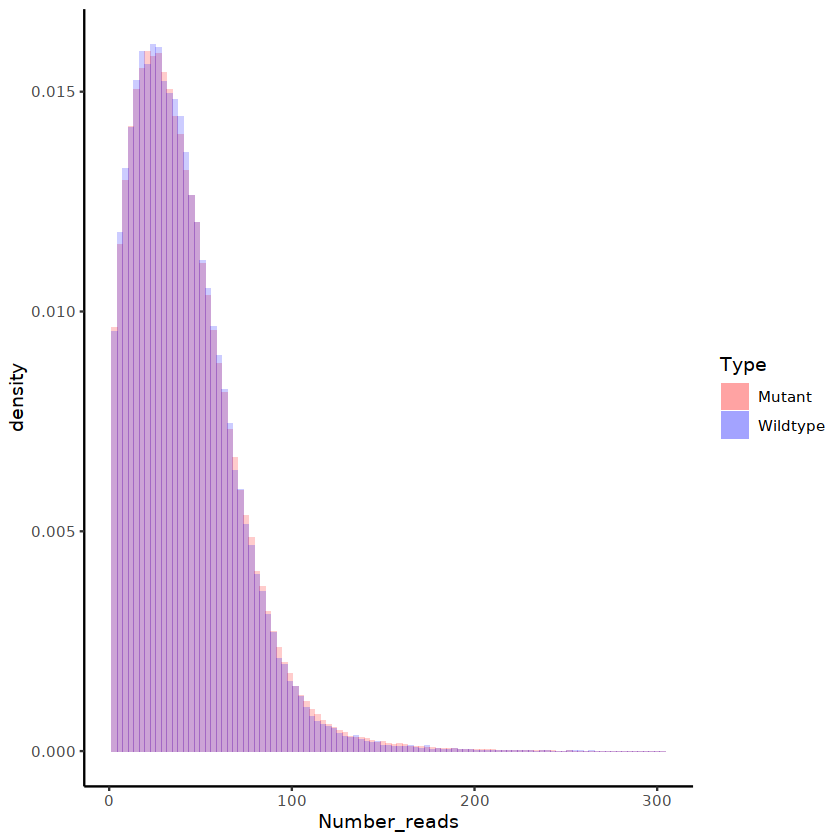

In [4]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

## Correct TSO artifects

In [5]:
tmp <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False' 
                            & !grepl('TSO',gRNA_UMI_variant$Mutation)),]
index <- which(gRNA_UMI_variant$Type == 'False' & !grepl('TSO',gRNA_UMI_variant$Mutation))
index <- index[!grepl('gRNA:0', tmp$Mutation)]
tmp <- tmp[!grepl('gRNA:0', tmp$Mutation),]
nrow(tmp) # Real Mutant UMIs
nrow(gRNA_UMI_variant) - nrow(tmp) # wildtype UMIs

gRNA_UMI_variant$Type[index] <- 'False'
gRNA_UMI_variant$Type[-index] <- 'True'

[1] 47594

[1] 593615

False 
7.422541

True 
92.57746

[1] "Number of mutant UMI"
[1] "Processed cell number: 7558"
[1] "Wildtype UMI: 593615"
[1] "Mutant UMI: 47594"


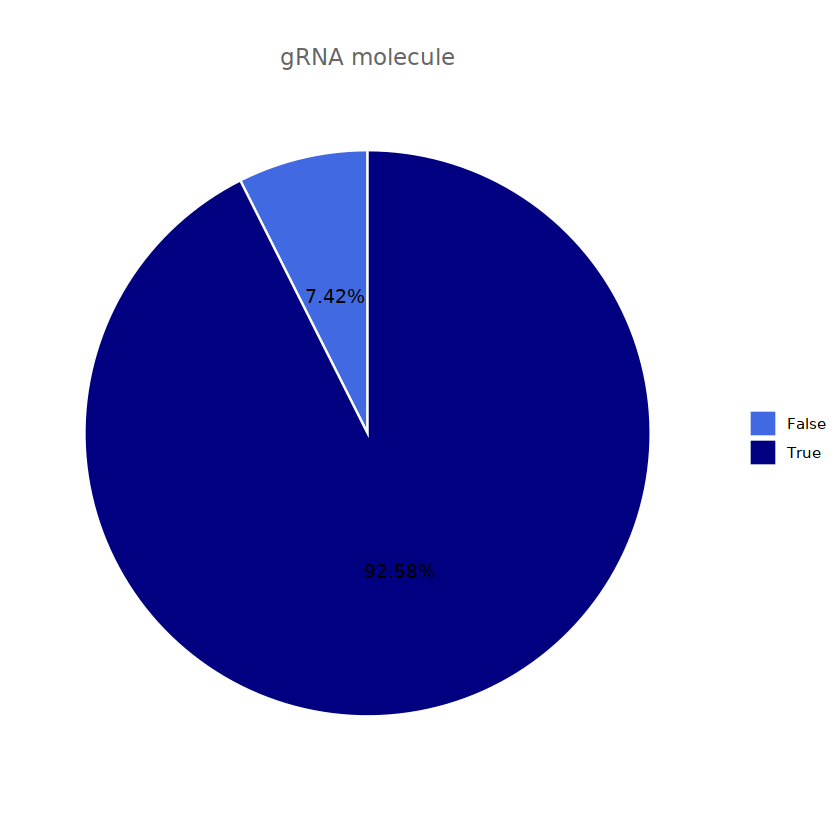

png 
  2

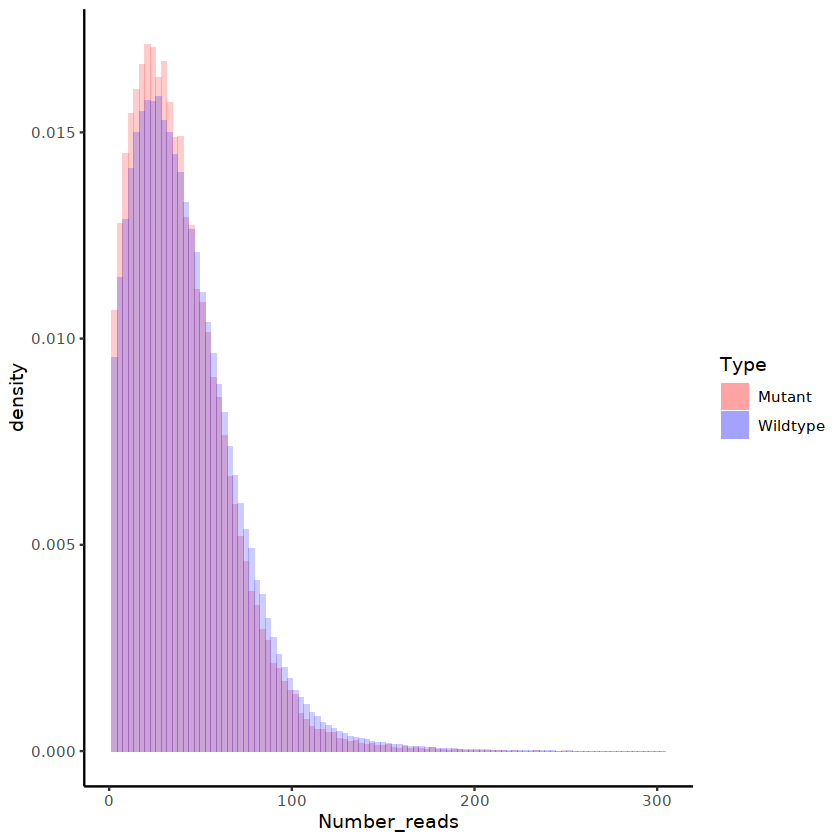

In [6]:
Freq = table(gRNA_UMI_variant$Type)
Freq[1] / (Freq[1] + Freq[2]) * 100
Freq[2] / (Freq[1] + Freq[2]) * 100

print('Number of mutant UMI')
print(paste0('Processed cell number: ' ,length(unique(gRNA_UMI_variant$CB))))
print(paste0('Wildtype UMI: ', Freq[2]))
print(paste0('Mutant UMI: ', Freq[1]))
#table(gRNA_UMI_variant$Type)

Freq.df = as.data.frame(table(gRNA_UMI_variant$Type))
colnames(Freq.df) <- c('Type','Number')

value = Freq.df$Number/sum(Freq.df$Number)

pie = ggplot(Freq.df, aes(x="", y=Number, fill=Type)) + geom_bar(stat="identity", width=1, color = 'white')
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(value*100, digit =2), "%")), 
                                              position = position_stack(vjust = 0.5))
# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "gRNA molecule")
# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("royalblue", "navy")) 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(hjust = 0.5, color = "#666666"))
print(pie)
p  <- ggplot(gRNA_UMI_variant, aes(x = Number_reads, fill = Type)) +
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False'),],
               aes(x= Number_reads, y = ..density.. ), alpha = 0.2,binwidth = 3)+
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'True'),],
               aes(x= Number_reads, y = ..density..), alpha = 0.2,binwidth = 3)+theme_classic()+
scale_fill_manual(name="Type", values=c("red","blue"),labels=c("Mutant","Wildtype"))
print(p)
save_pdf <- paste0(output_dir,'.UMI_MT.pdf')
pdf(save_pdf, height = 8, width = 8)
print(pie)
print(p)
dev.off()


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(4) D(5) D(8)    G I(1) I(2) I(3)    T 
  53    9   23   15   10    5    2    1    7   86   23    3    5 
[1] "MT mutation type"

  D   I   S 
 56 112  74 
[1] "MT mutation structure"

gRNA Rest  TSO 
  76   50  116 


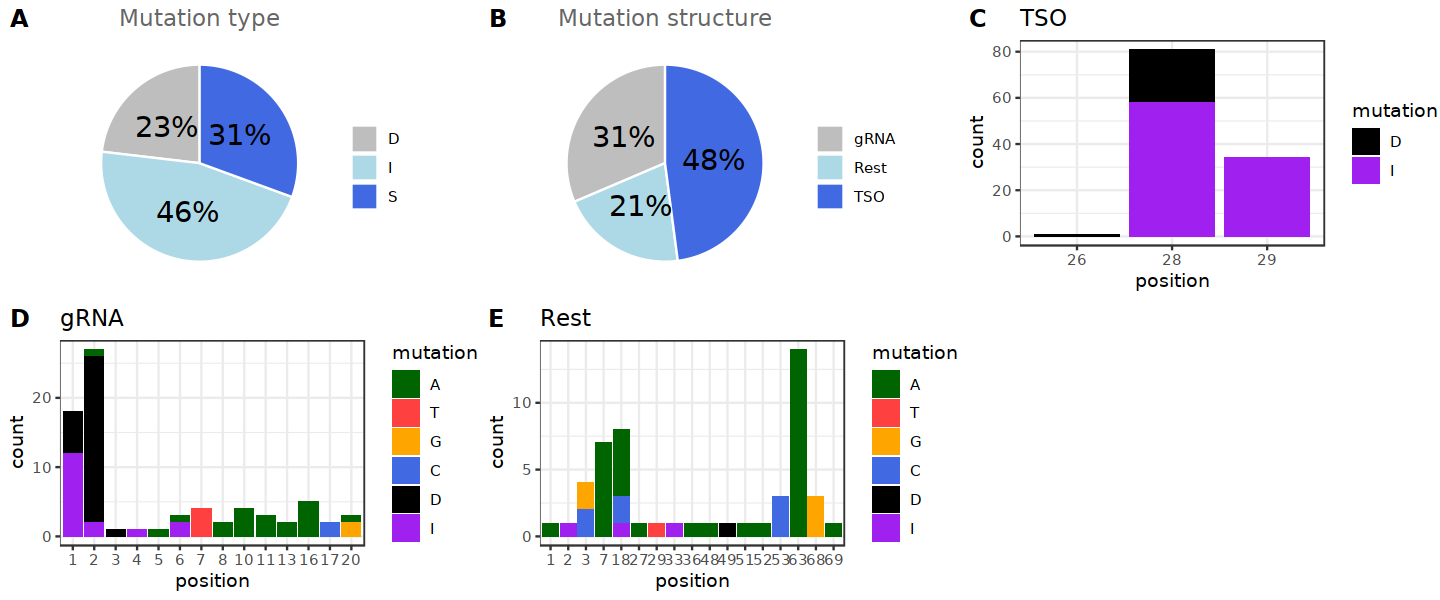

In [7]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [8]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.301   2.000   3.000 

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 26 rows containing non-finite values (`stat_count()`).”


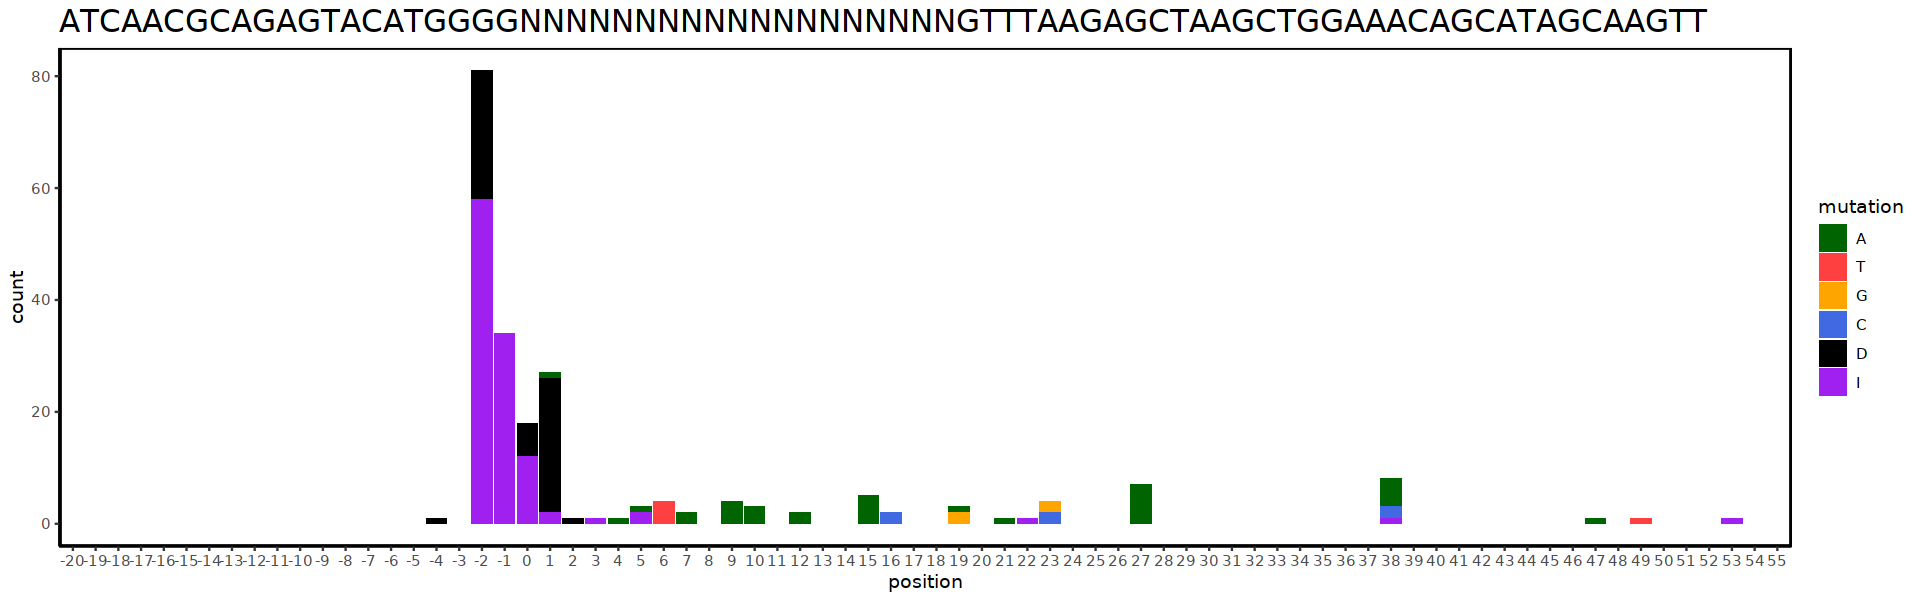

In [9]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
#dev.off()

## correct TSO

Remove Insertion and Delection next to GGGG

[1] 27

Warning message:
“Removed 19 rows containing non-finite values (`stat_count()`).”


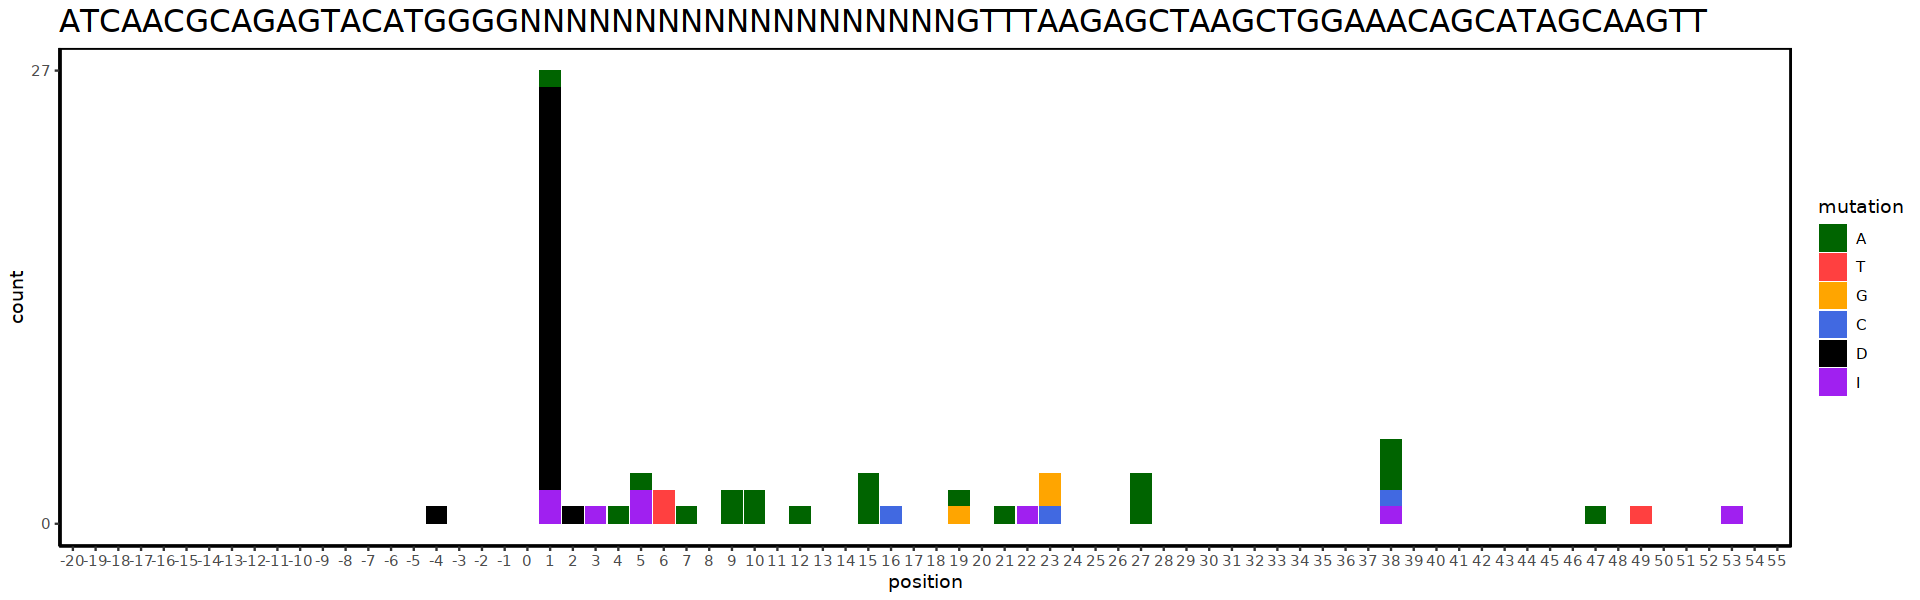

In [11]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted_TSO.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]


# Must before the factor(MT2$position)
########
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)
#######


MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

max(table(MT2$position))
#options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')+
scale_y_continuous(breaks = c(0,max(table(MT2$position))))
#dev.off()

In [12]:
#MT2[which(MT2$position == 1),] # all true, verfied manually, beginning of gRNA easly to have deletion when complementary with GGG

# Remove TSO artifacts for cell-gRNA assignment


[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(4) D(5) D(8)    G I(1) I(2) I(3)    T 
  53    9   23   15   10    5    2    1    7   86   23    3    5 
[1] "MT mutation type"

  D   I   S 
 56 112  74 
[1] "MT mutation structure"

gRNA Rest  TSO 
  76   50  116 


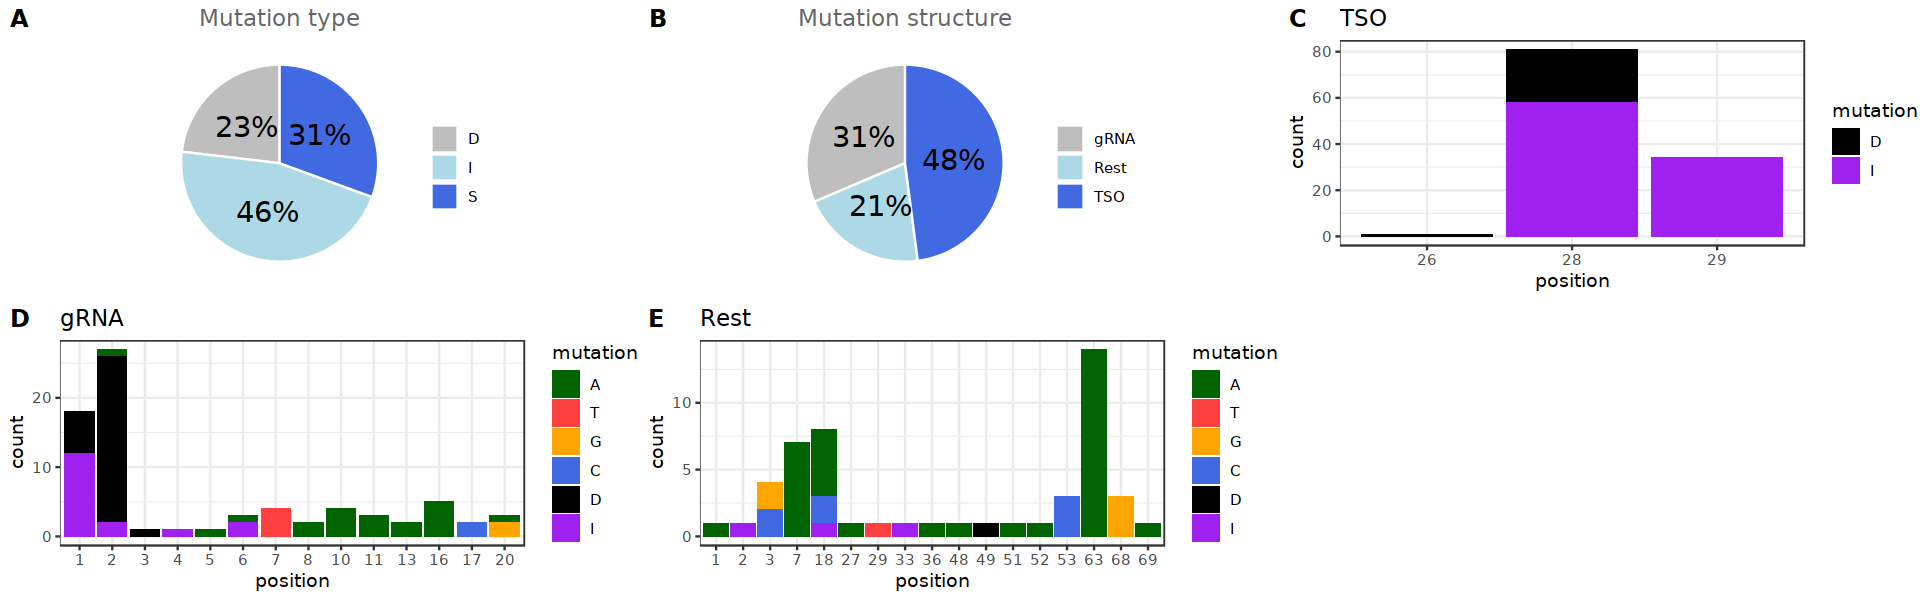

In [12]:
input_dir = './GiRAFR_outputs/Replogle_NatureBiotechnology/sample1/'
output_dir = './figures_results/Replogle_NatureBiotechnology/sample1'
MT <- plot_MT_pattern(input_dir, output_dir)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
MT2_nodedup <- MT2
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)

MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


In [13]:
#dim(MT2) # presumed real mutant sgRNAs after removal of TSO artifacts without dedup
MT2_list_nodedup <- unique(MT2_nodedup$`variant number`)
length(MT2_list_nodedup)

[1] 102

In [14]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)

colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA

In [16]:
cells.gRNA <- cells.gRNA.ori
cells.gRNA.WTcounts <- cells.gRNA[,1:5]
for(i in seq(6,n_col-2,2)){
    MT.df <- cells.gRNA[,i:(i+1)]
    colnames(MT.df) <- c('MT','num_UMI_MT')
    MT.notInlist <- MT.df[!MT.df$MT %in% MT2_list_nodedup,]
    index <- !MT.df$MT %in% MT2_list_nodedup
    MT.notInlist$num_UMI_MT[is.na(MT.notInlist$num_UMI_MT)] <- 0
    cells.gRNA.WTcounts$num_UMI_WT[index] <- cells.gRNA.WTcounts$num_UMI_WT[index] + MT.notInlist$num_UMI_MT
    cells.gRNA[index,i:(i+1)] <- NA # make MT not in list as NA
}
cells.gRNA[,1:5] <- cells.gRNA.WTcounts
for(i in seq(1, nrow(cells.gRNA))){
    num_MT <- (sum(!is.na(cells.gRNA[i,])) - 5)/2 #updated number of gRNA
    if(cells.gRNA[i,5] > 0){
        cells.gRNA$feature_order[i] <- num_MT + 1
    }else{
        cells.gRNA$feature_order[i] <- num_MT
    }
}
# now feature order is no longer accumulated !!!
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = sum(feature_order))
#cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = (num_UMI_WT == 0)) %>% summarise(has_MT=any(is_MT))
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(contain_MT = (feature_order > 1), is_MT = (num_UMI_WT == 0)) %>% summarise(has_MT=any(contain_MT, is_MT))

# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


In [17]:
table(cells.num_features$num_features)
sum(table(cells.num_features$num_features))


   1    2    3    4    5 
4965 1376  207   38    5 

[1] 6591

In [18]:
sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
tmp <- cells.gRNA %>% group_by(cb) %>% summarise(contain_MT = (feature_order > 1), is_MT = (num_UMI_WT == 0))
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
sum(cells.gRNA[which(cells.gRNA$num_UMI_WT > 0),'feature_order']-1) + sum(cells.gRNA[which(cells.gRNA$num_UMI_WT == 0),'feature_order'])
# cells with mutations (multiplets count as multiple)

[1] 8515

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


[1] 1438

In [19]:
table(cells.gRNA[which(cells.gRNA$num_UMI_WT ==0),'feature_order']) # cells have more than 1 mutation of the same gRNA



  1   2   3 
146  37   3 

In [20]:
cells.gRNA_cs2 <- cells.gRNA
cells.num_features_cs2 <- cells.num_features
cells.has_MT_cs2 <- cells.has_MT

sum(cells.has_MT_cs2$has_MT)
sum(cells.has_MT_cs2[which(cells.has_MT_cs2$cb %in% cells.num_features_cs2[which(cells.num_features_cs2$num_features == 1),]$cb),]$has_MT)


[1] 1335

[1] 113

In [21]:
length(unique(cells.gRNA_cs2[which(cells.gRNA_cs2$feature_order > 1 & cells.gRNA_cs2$num_UMI_WT > 0),'cb']))
#Cells with both MT and WT of the same gRNA

[1] 1155

Rows: 8272 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


png 
  2

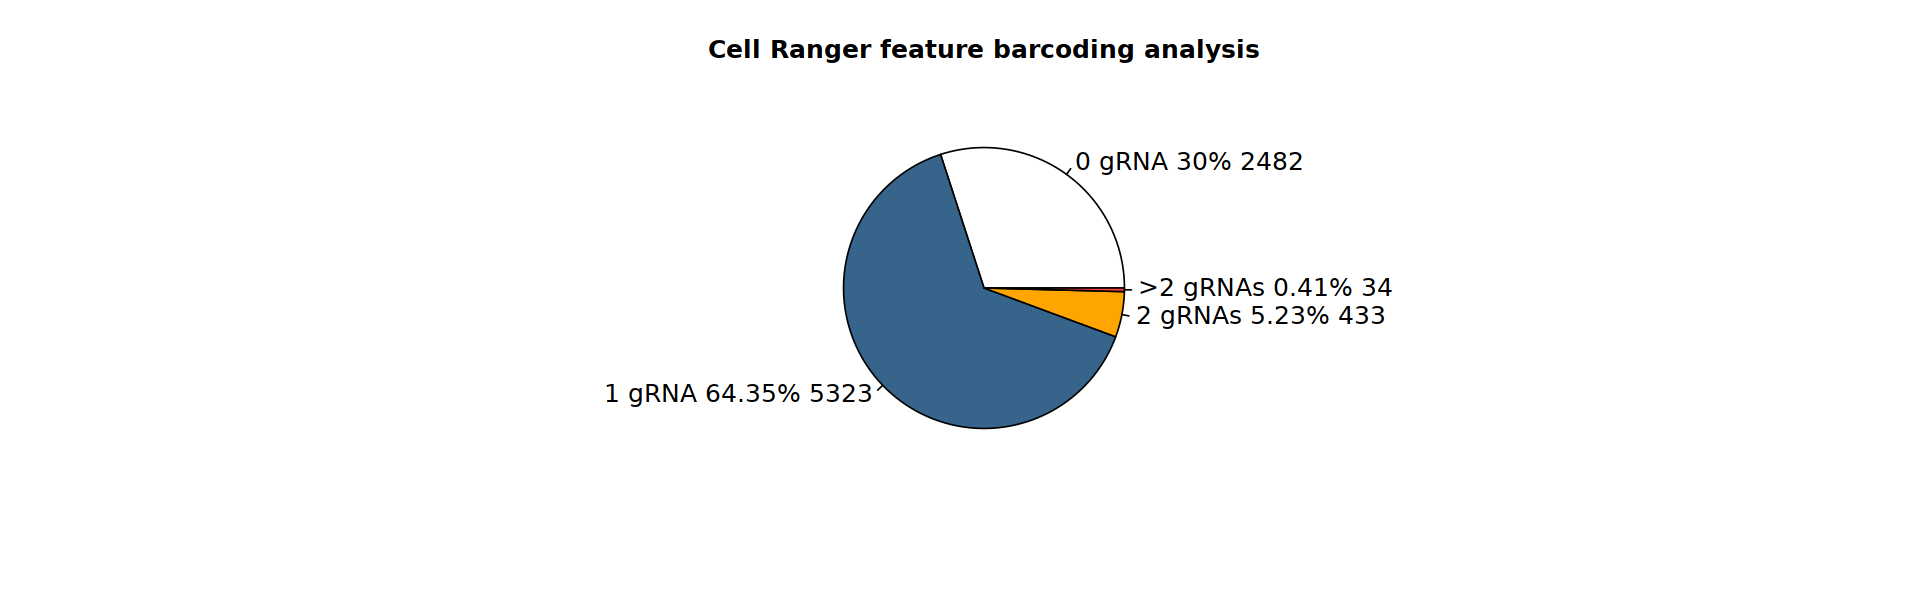

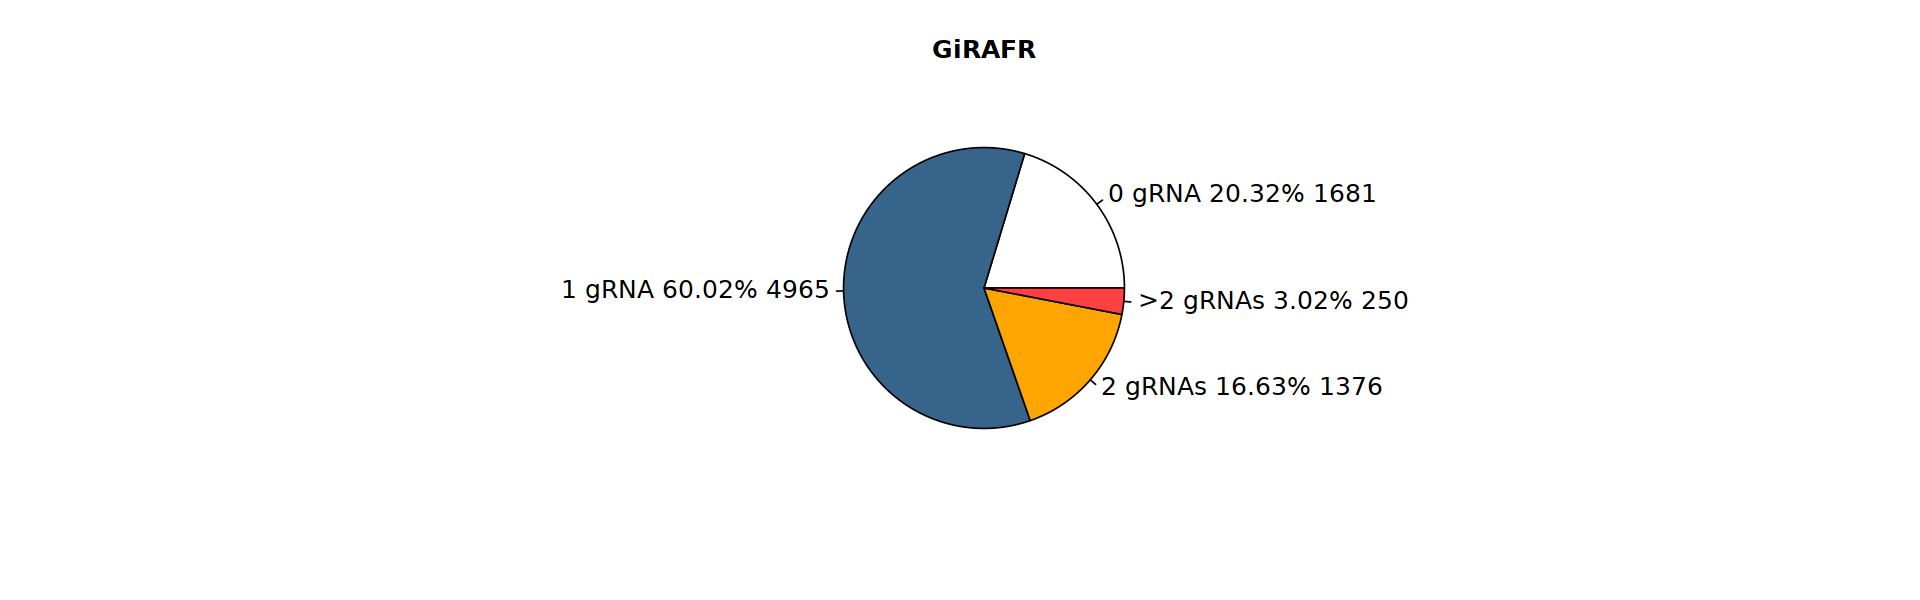

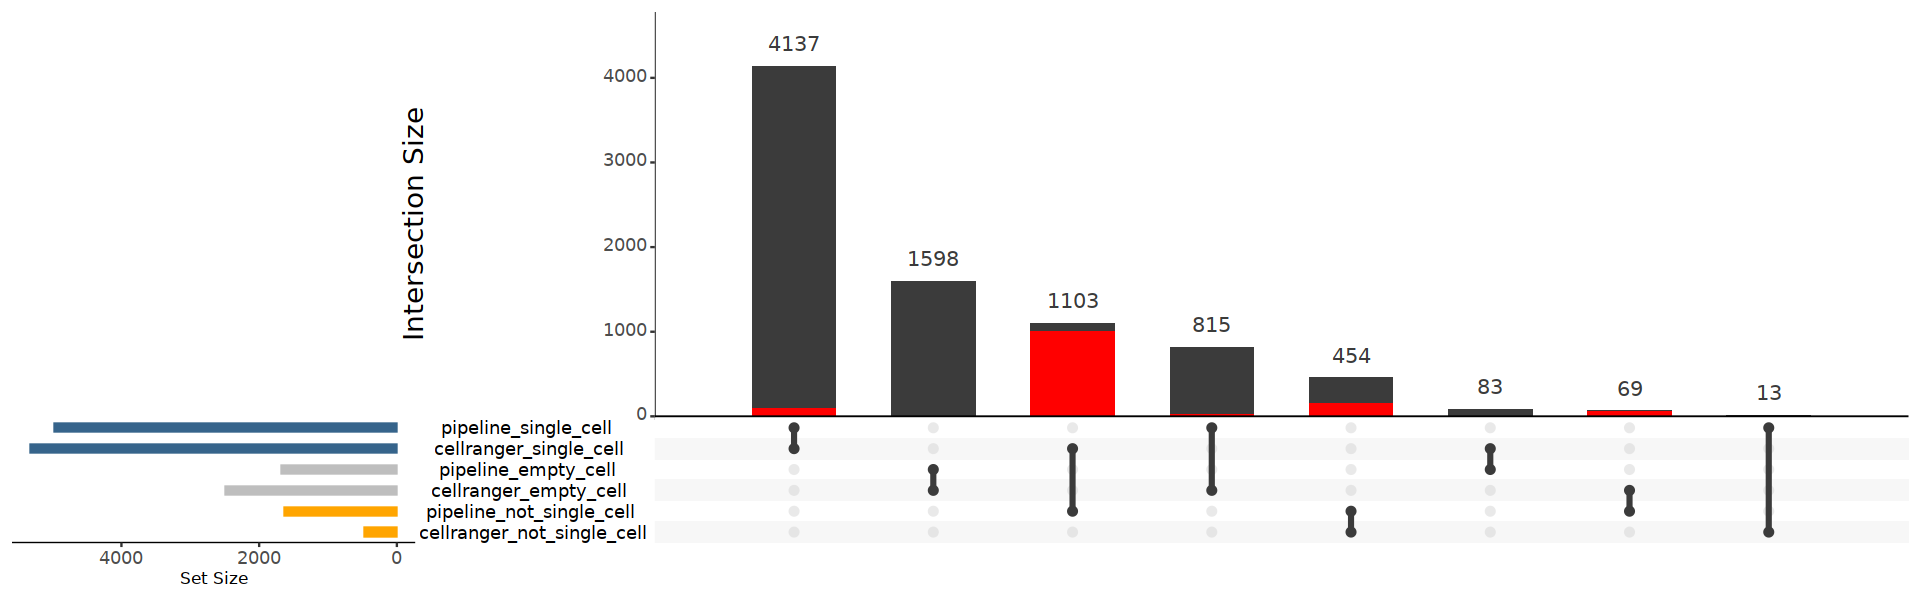

In [22]:
protospacer_file <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/feature_barcoding_analysis/sgRNAcs2/outs/crispr_analysis/protospacer_calls_per_cell.csv'
barcodes_file <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/feature_barcoding_analysis/sgRNAcs2/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
protospacer_calls_per_cell <-read.csv(protospacer_file, stringsAsFactors = FALSE)
cellranger_barcode <- read_csv(barcodes_file, col_names = FALSE)

save_pdf <- paste0(output_dir, '.compare_cell_number_TSO.pdf')
pdf(save_pdf, height = 8, width = 10)

pipeline_NotEmpty <- cells.num_features$cb
pipeline_Single <- cells.num_features$cb[which(cells.num_features$num_features == 1)]
par(mar = c(1,1,1,10))
slices1 <- c(nrow(cellranger_barcode) - sum(table(protospacer_calls_per_cell$num_features)),
        as.vector(table(protospacer_calls_per_cell$num_features)[1]),
        as.vector(table(protospacer_calls_per_cell$num_features)[2]),
        sum(table(protospacer_calls_per_cell$num_features)[-(1:2)]))
lbls1 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct1 <- round(slices1/sum(slices1)*100, digit =2 )
lbls1 <- paste(lbls1, pct1) # add percents to labels
lbls1 <- paste(lbls1,"%",sep="") # ad % to labels
lbls1 <- paste(lbls1, slices1, sep =' ')
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')

par(mar = c(5,1,1,10))
slices2 <- c(nrow(cellranger_barcode) - sum(table(cells.num_features$num_features)),
        as.vector(table(cells.num_features$num_features)[1]),
        as.vector(table(cells.num_features$num_features)[2]),
        sum(table(cells.num_features$num_features)[-(1:2)]))
lbls2 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct2 <- round(slices2/sum(slices2)*100, digit = 2)
lbls2 <- paste(lbls2, pct2) # add percents to labels
lbls2 <- paste(lbls2,"%",sep="") # ad % to labels
lbls2 <- paste(lbls2, slices2, sep =' ')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')

all_barcodes <- as.data.frame(cellranger_barcode)
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 0, 
                                            ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 1, 0))

all_barcodes$cellranger_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 1, 0)
all_barcodes$cellranger_empty_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 0, 1)
all_barcodes$cellranger_not_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 0, 
                                            ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT, by.x = 'X1', by.y = 'cb', all.x = TRUE)

#table(all_barcodes$pipeline_single_cell, all_barcodes$has_MT)
#table(all_barcodes$has_MT)

Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes, 
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('cellranger_not_single_cell','pipeline_not_single_cell',
           'cellranger_empty_cell','pipeline_empty_cell',
           'cellranger_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"), 
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))
print(p)

dev.off()
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')
p



In [23]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
  806    78 

# sgRNAcs1

GSM4367980	exp2: UPR 3' sgRNAcs1

In [24]:
input_dir = './GiRAFR_outputs/Replogle_NatureBiotechnology/sample2/'
output_dir = './figures_results/Replogle_NatureBiotechnology/sample2'

## All UMI profile

[1] "Number of mutant UMI"
[1] "Processed cell number: 8674"
[1] "Wildtype UMI: 817252"
[1] "Mutant UMI: 4709011"


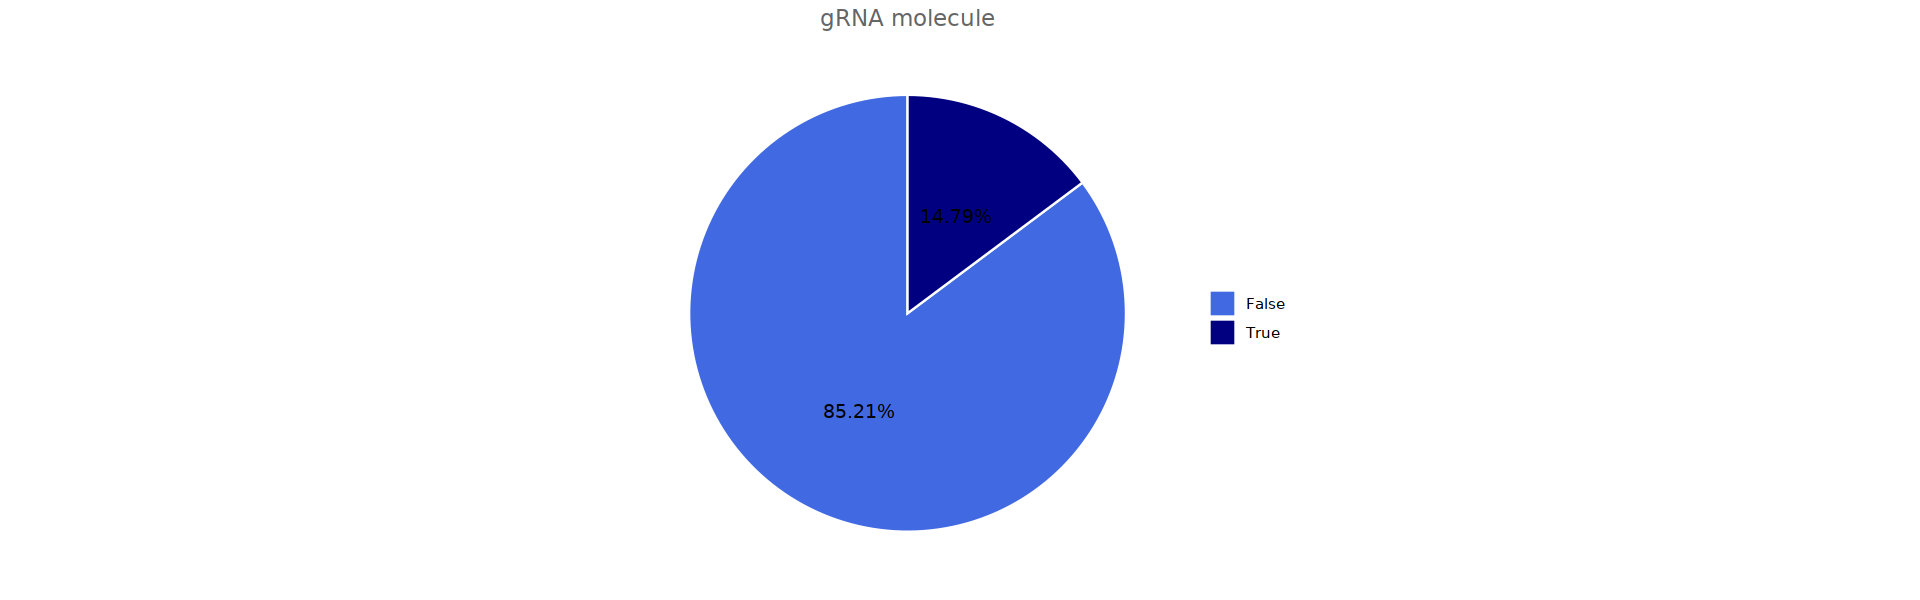

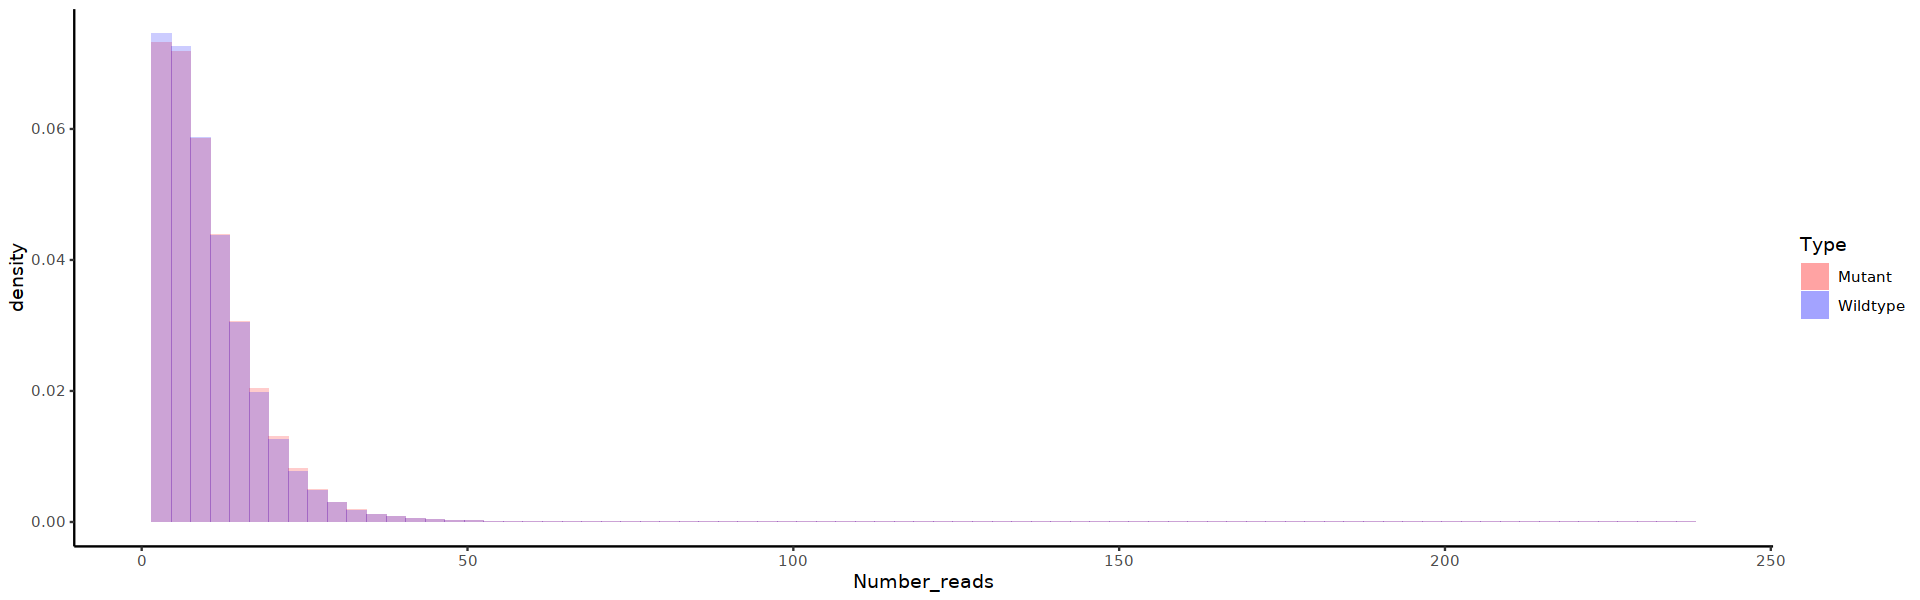

In [25]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

## Correct TSO artifects

In [26]:
tmp <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False' 
                            & !grepl('TSO',gRNA_UMI_variant$Mutation)),]
index <- which(gRNA_UMI_variant$Type == 'False' & !grepl('TSO',gRNA_UMI_variant$Mutation))
index <- index[!grepl('gRNA:0', tmp$Mutation)]
tmp <- tmp[!grepl('gRNA:0', tmp$Mutation),]
nrow(tmp) # Real Mutant UMIs
nrow(gRNA_UMI_variant) - nrow(tmp) # wildtype UMIs

gRNA_UMI_variant$Type[index] <- 'False'
gRNA_UMI_variant$Type[-index] <- 'True'

[1] 520040

[1] 5006223

False 
9.410338

True 
90.58966

[1] "Number of mutant UMI"
[1] "Processed cell number: 8674"
[1] "Wildtype UMI: 5006223"
[1] "Mutant UMI: 520040"


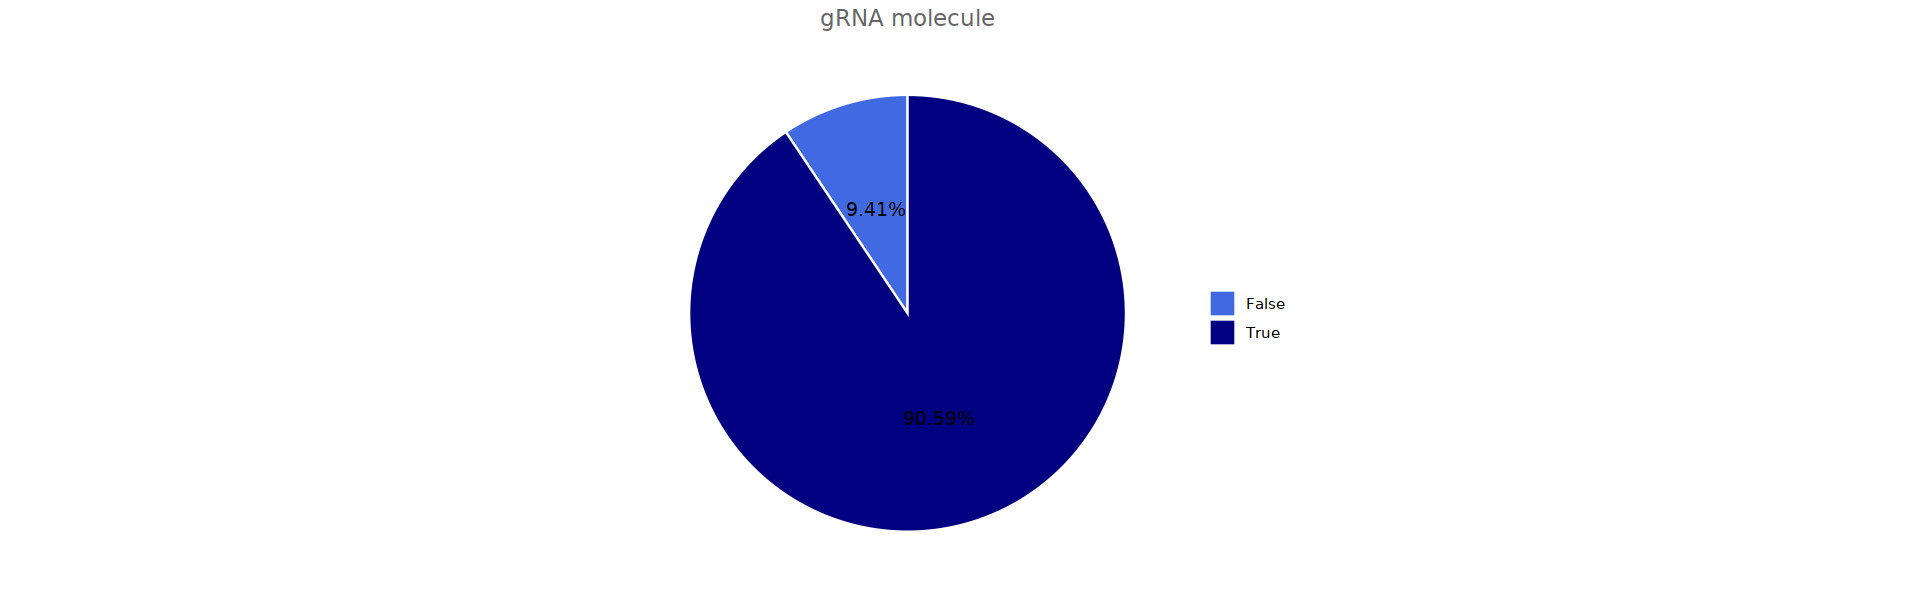

png 
  2

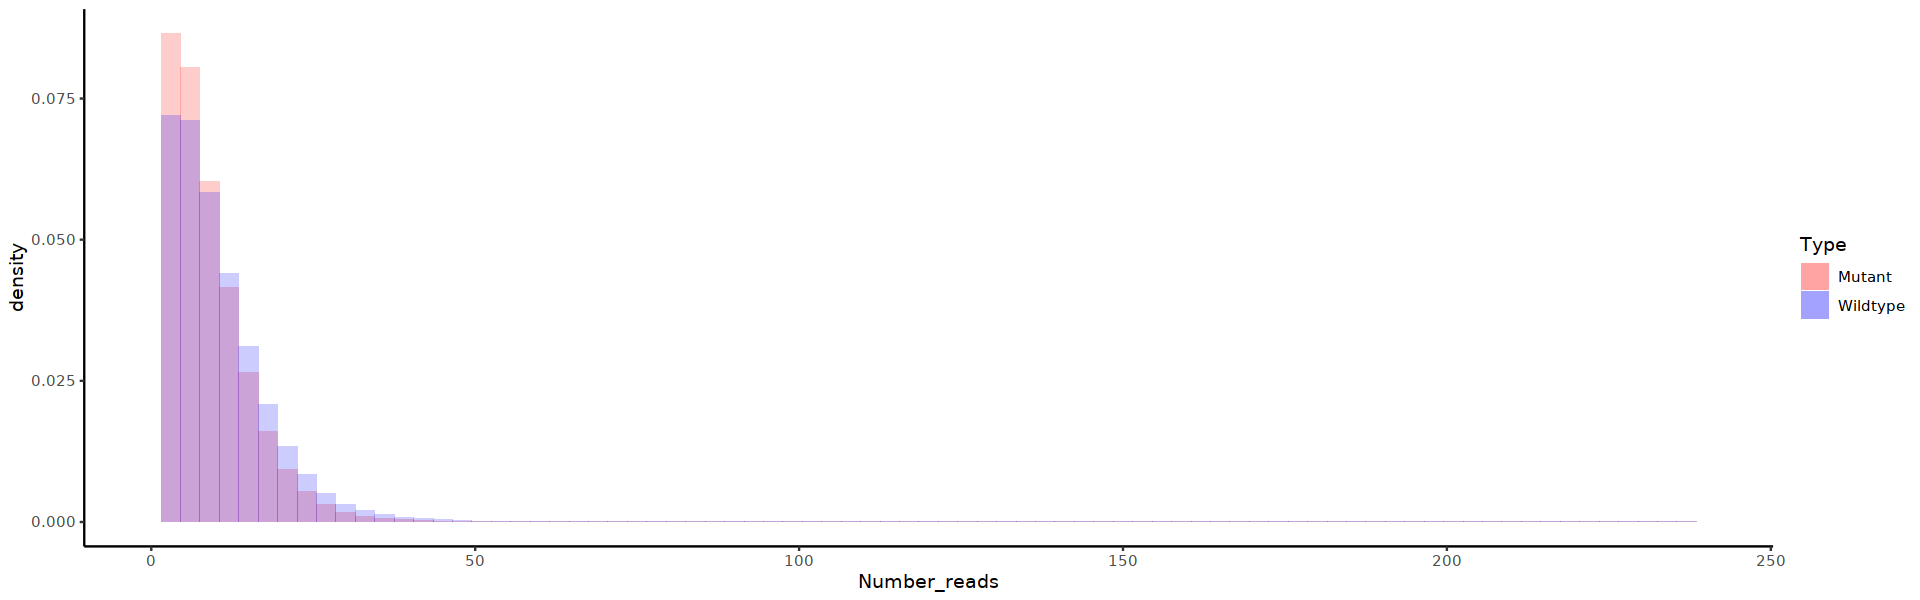

In [27]:
Freq = table(gRNA_UMI_variant$Type)
Freq[1] / (Freq[1] + Freq[2]) * 100
Freq[2] / (Freq[1] + Freq[2]) * 100

print('Number of mutant UMI')
print(paste0('Processed cell number: ' ,length(unique(gRNA_UMI_variant$CB))))
print(paste0('Wildtype UMI: ', Freq[2]))
print(paste0('Mutant UMI: ', Freq[1]))
#table(gRNA_UMI_variant$Type)

Freq.df = as.data.frame(table(gRNA_UMI_variant$Type))
colnames(Freq.df) <- c('Type','Number')

value = Freq.df$Number/sum(Freq.df$Number)

pie = ggplot(Freq.df, aes(x="", y=Number, fill=Type)) + geom_bar(stat="identity", width=1, color = 'white')
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(value*100, digit =2), "%")), 
                                              position = position_stack(vjust = 0.5))
# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "gRNA molecule")
# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("royalblue", "navy")) 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(hjust = 0.5, color = "#666666"))
print(pie)
p  <- ggplot(gRNA_UMI_variant, aes(x = Number_reads, fill = Type)) +
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False'),],
               aes(x= Number_reads, y = ..density.. ), alpha = 0.2,binwidth = 3)+
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'True'),],
               aes(x= Number_reads, y = ..density..), alpha = 0.2,binwidth = 3)+theme_classic()+
scale_fill_manual(name="Type", values=c("red","blue"),labels=c("Mutant","Wildtype"))
print(p)
save_pdf <- paste0(output_dir,'.UMI_MT.pdf')
pdf(save_pdf, height = 8, width = 8)
print(pie)
print(p)
dev.off()


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(4) D(5)    G I(1) I(2) I(3)    T 
  47    7   20   21   14    5    3    4   80   45    2   20 
[1] "MT mutation type"

  D   I   S 
 63 127  78 
[1] "MT mutation structure"

gRNA Rest  TSO 
 101   48  119 


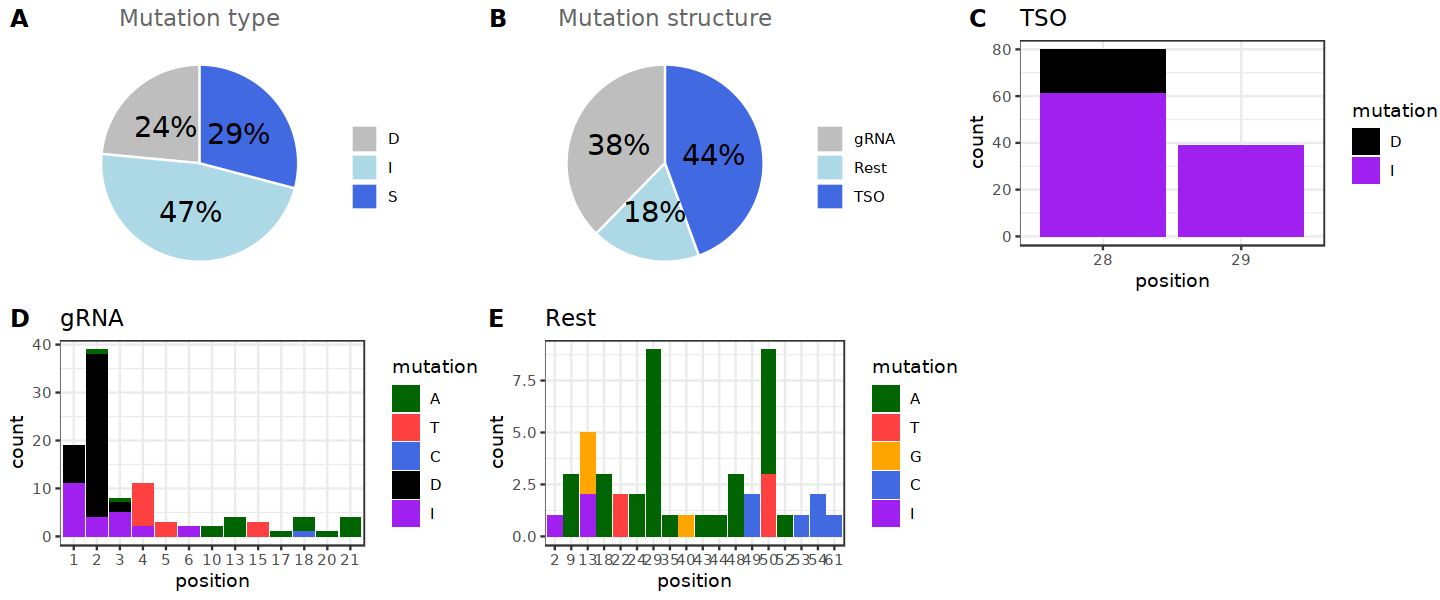

In [28]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [29]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.264   2.000   2.000 

Warning message:
“Removed 22 rows containing non-finite values (`stat_count()`).”


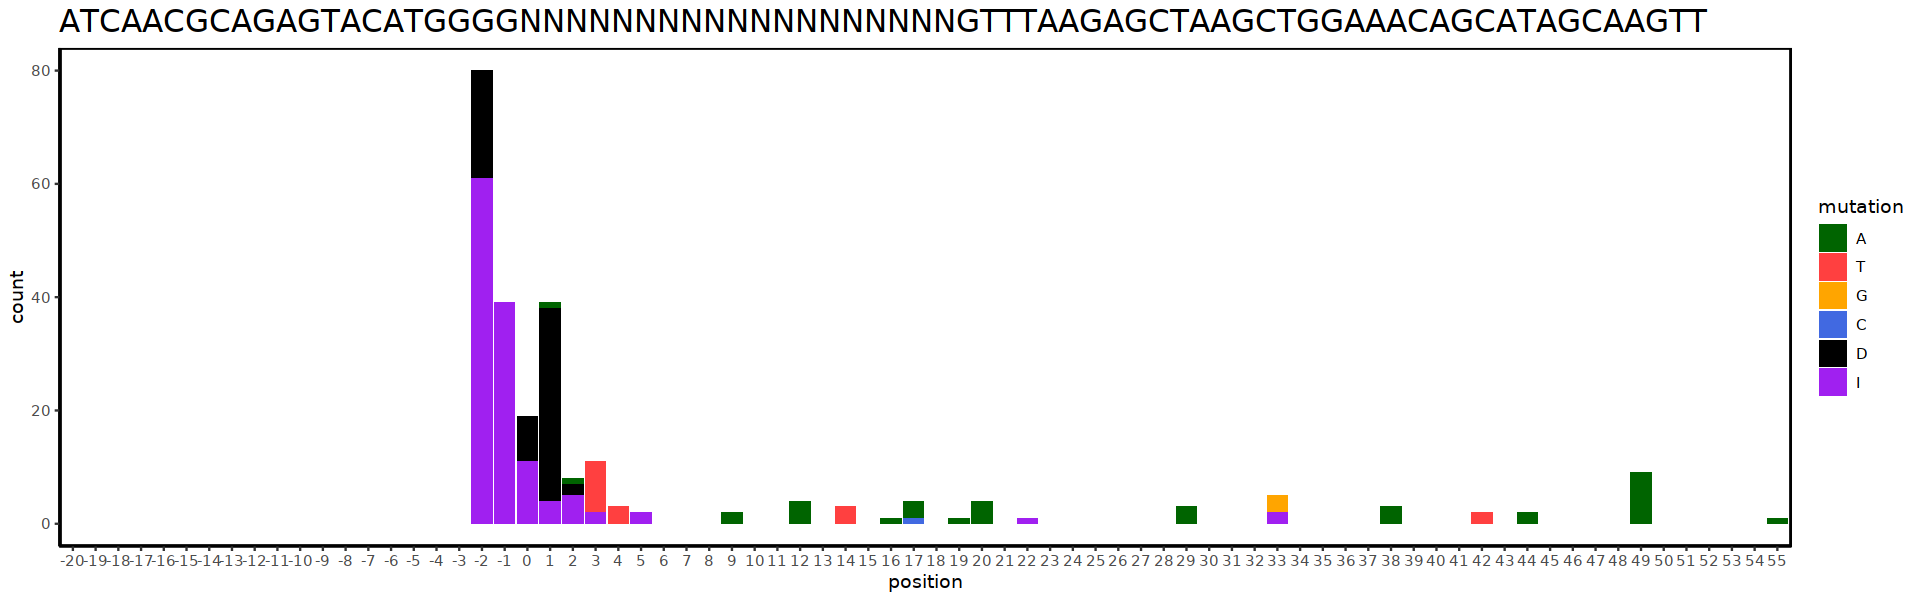

In [30]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
#dev.off()

[1] 37

Warning message:
“Removed 15 rows containing non-finite values (`stat_count()`).”


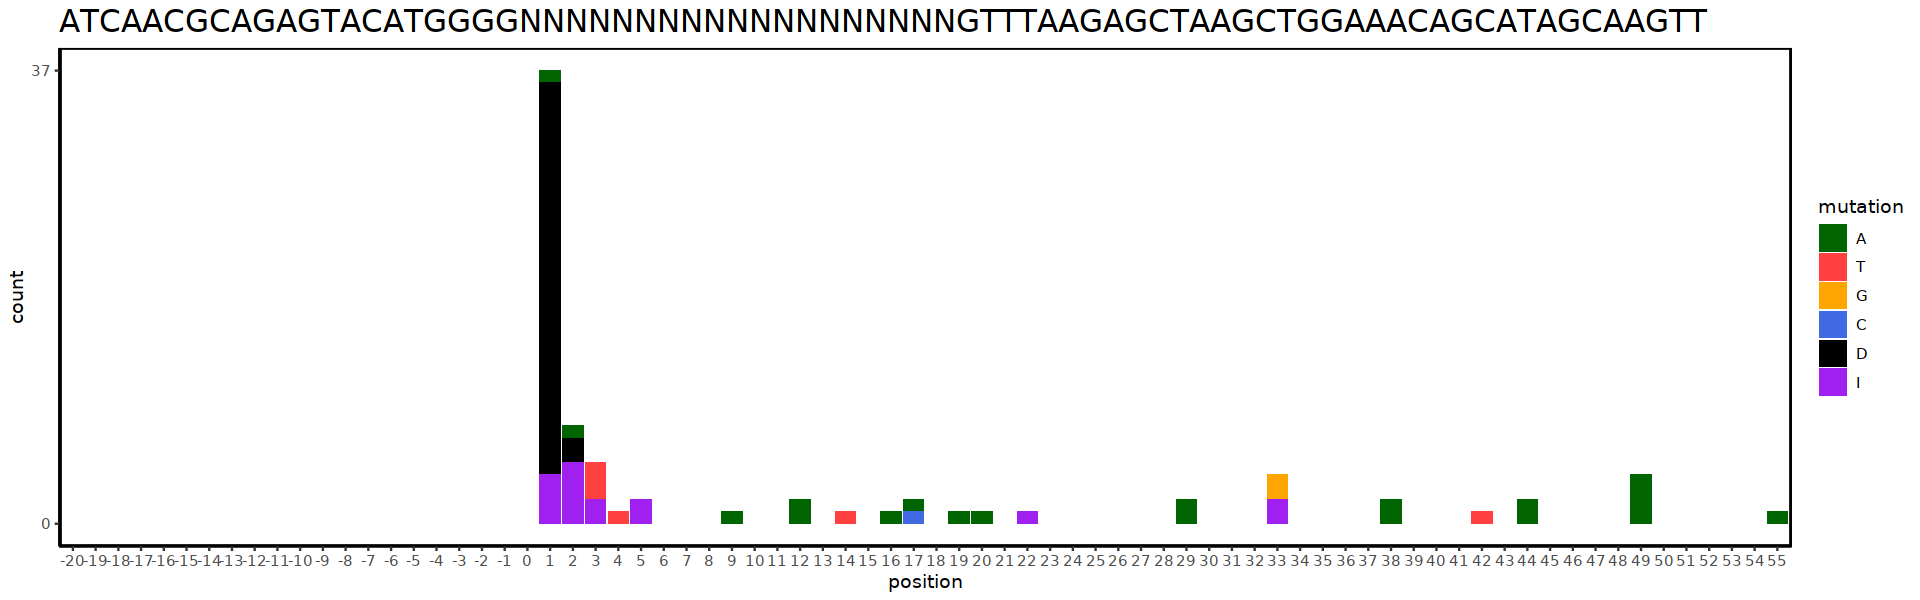

In [31]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted_TSO.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]

#########
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)
#########

MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
max(table(MT2$position))
options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')+
scale_y_continuous(breaks = c(0,max(table(MT2$position))))
#dev.off()

# Remove TSO artifacts for cell-gRNA assignment


[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(4) D(5)    G I(1) I(2) I(3)    T 
  47    7   20   21   14    5    3    4   80   45    2   20 
[1] "MT mutation type"

  D   I   S 
 63 127  78 
[1] "MT mutation structure"

gRNA Rest  TSO 
 101   48  119 


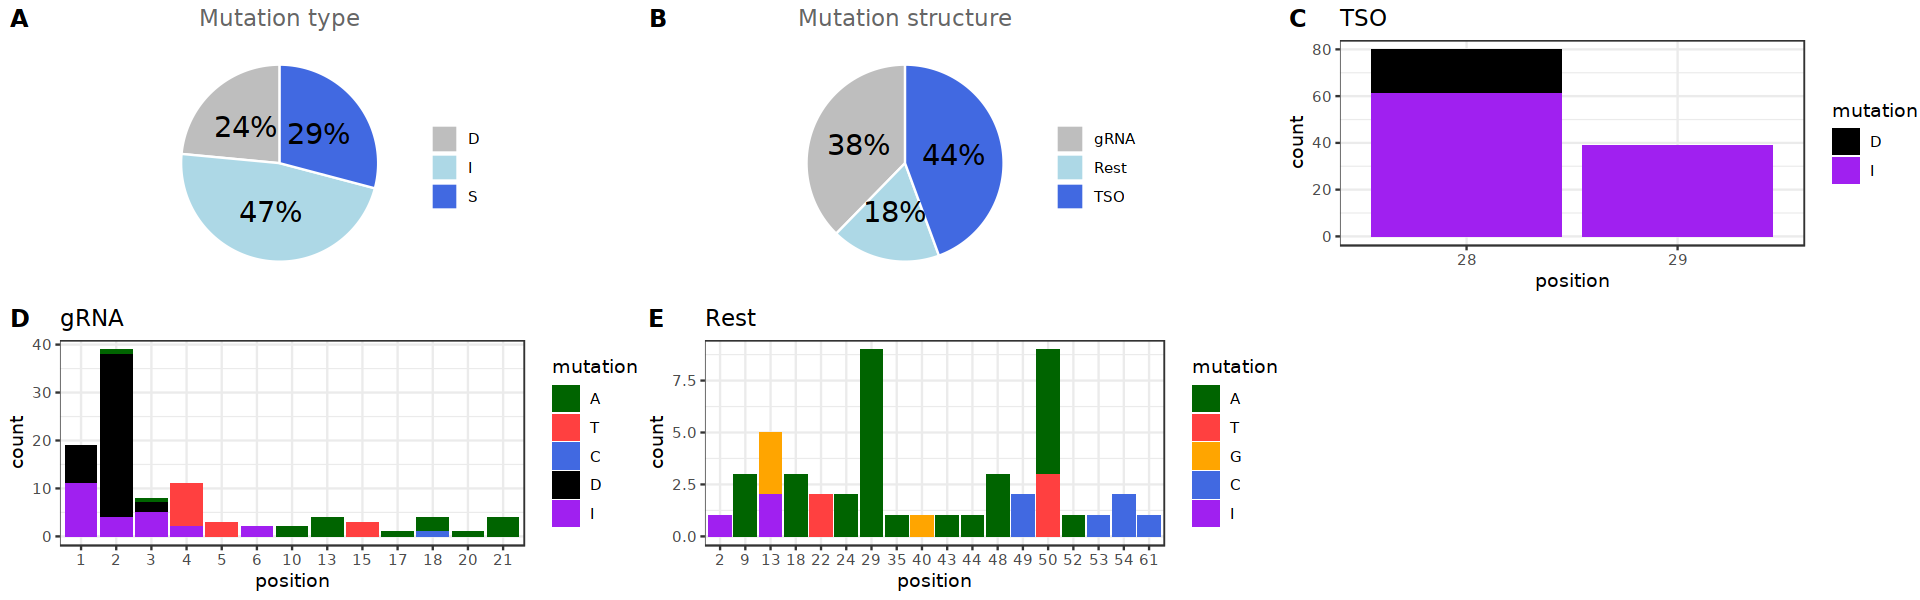

In [32]:
input_dir = './GiRAFR_outputs/Replogle_NatureBiotechnology/sample2/'
output_dir = './figures_results/Replogle_NatureBiotechnology/sample2'
MT <- plot_MT_pattern(input_dir, output_dir)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
MT2_nodedup <- MT2
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)

MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


In [33]:
#dim(MT2) # presumed real mutant sgRNAs after removal of TSO artifacts without dedup
MT2_list_nodedup <- unique(MT2_nodedup$`variant number`)
length(MT2_list_nodedup)

[1] 121

In [34]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)

colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA

In [35]:
cells.gRNA <- cells.gRNA.ori
cells.gRNA.WTcounts <- cells.gRNA[,1:5]
for(i in seq(6,n_col-2,2)){
    MT.df <- cells.gRNA[,i:(i+1)]
    colnames(MT.df) <- c('MT','num_UMI_MT')
    MT.notInlist <- MT.df[!MT.df$MT %in% MT2_list_nodedup,]
    index <- !MT.df$MT %in% MT2_list_nodedup
    MT.notInlist$num_UMI_MT[is.na(MT.notInlist$num_UMI_MT)] <- 0
    cells.gRNA.WTcounts$num_UMI_WT[index] <- cells.gRNA.WTcounts$num_UMI_WT[index] + MT.notInlist$num_UMI_MT
    cells.gRNA[index,i:(i+1)] <- NA # make MT not in list as NA
}
cells.gRNA[,1:5] <- cells.gRNA.WTcounts
for(i in seq(1, nrow(cells.gRNA))){
    num_MT <- (sum(!is.na(cells.gRNA[i,])) - 5)/2 #updated number of gRNA
    if(cells.gRNA[i,5] > 0){
        cells.gRNA$feature_order[i] <- num_MT + 1
    }else{
        cells.gRNA$feature_order[i] <- num_MT
    }
}
# now feature order is no longer accumulated 
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = sum(feature_order))
#cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = (num_UMI_WT == 0)) %>% summarise(has_MT=any(is_MT))
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(contain_MT = (feature_order > 1), is_MT = (num_UMI_WT == 0)) %>% summarise(has_MT=any(contain_MT, is_MT))

# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


In [36]:
table(cells.num_features$num_features)
sum(table(cells.num_features$num_features))


   1    2    3    4    5    6    8 
5135 2089  604  108   20    7    1 

[1] 7964

In [37]:
sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
tmp <- cells.gRNA %>% group_by(cb) %>% summarise(contain_MT = (feature_order > 1), is_MT = (num_UMI_WT == 0))
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
sum(cells.gRNA[which(cells.gRNA$num_UMI_WT > 0),'feature_order']-1) + sum(cells.gRNA[which(cells.gRNA$num_UMI_WT == 0),'feature_order'])
# cells with mutations (multiplets count as multiple)

[1] 11707

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


[1] 2837

In [38]:
table(cells.gRNA[which(cells.gRNA$num_UMI_WT ==0),'feature_order']) # cells have more than 1 mutation of the same gRNA



  1   2   3   4 
158  33  12   3 

In [39]:
cells.gRNA_cs1 <- cells.gRNA
cells.num_features_cs1 <- cells.num_features
cells.has_MT_cs1 <- cells.has_MT
sum(cells.has_MT_cs1$has_MT)
sum(cells.has_MT_cs1[which(cells.has_MT_cs1$cb %in% cells.num_features_cs1[which(cells.num_features_cs1$num_features == 1),]$cb),]$has_MT)


[1] 2417

[1] 106

In [40]:
length(unique(cells.gRNA_cs1[which(cells.gRNA_cs1$feature_order > 1 & cells.gRNA_cs1$num_UMI_WT > 0),'cb']))
#Cells with both MT and WT of the same gRNA

[1] 2224

Rows: 8725 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


png 
  2

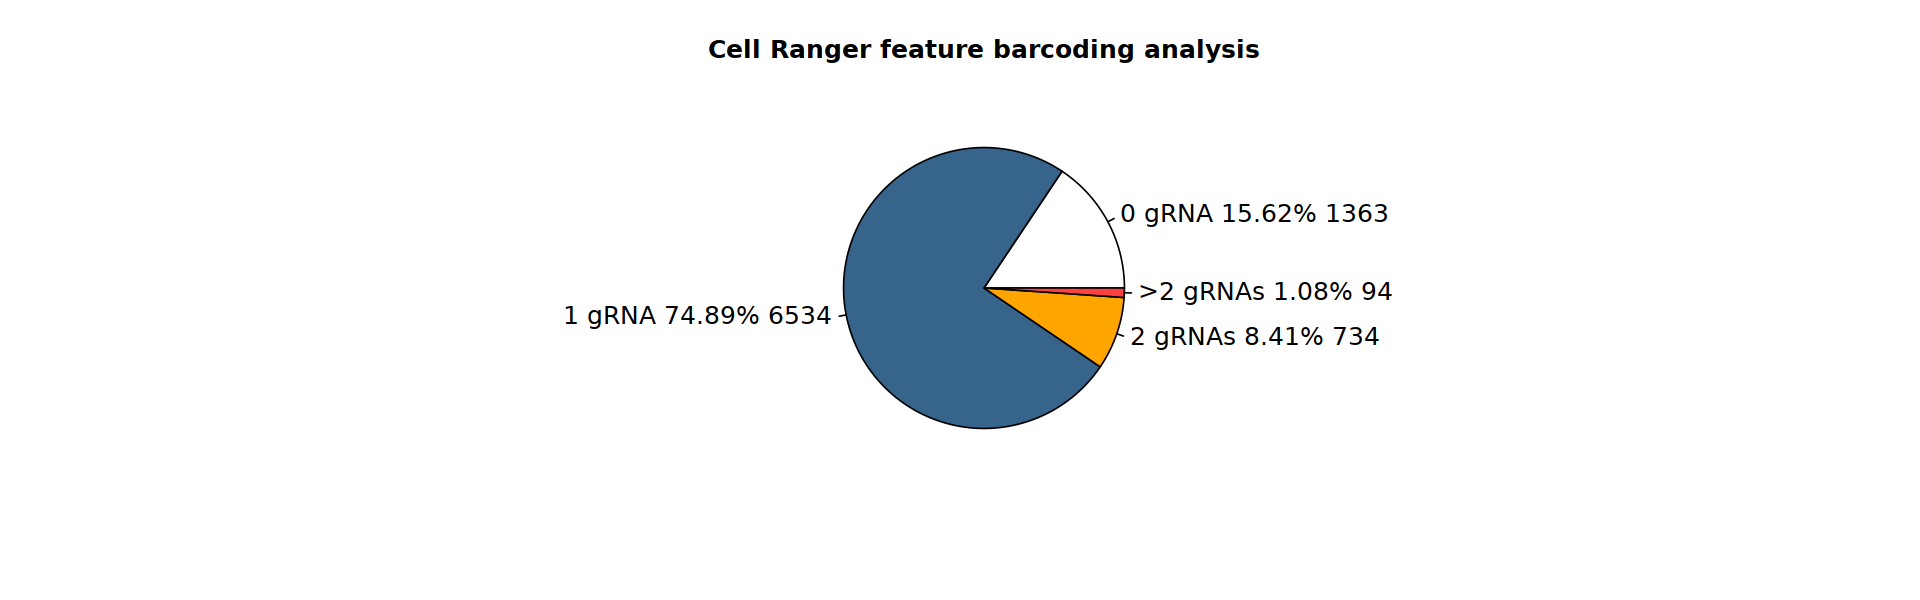

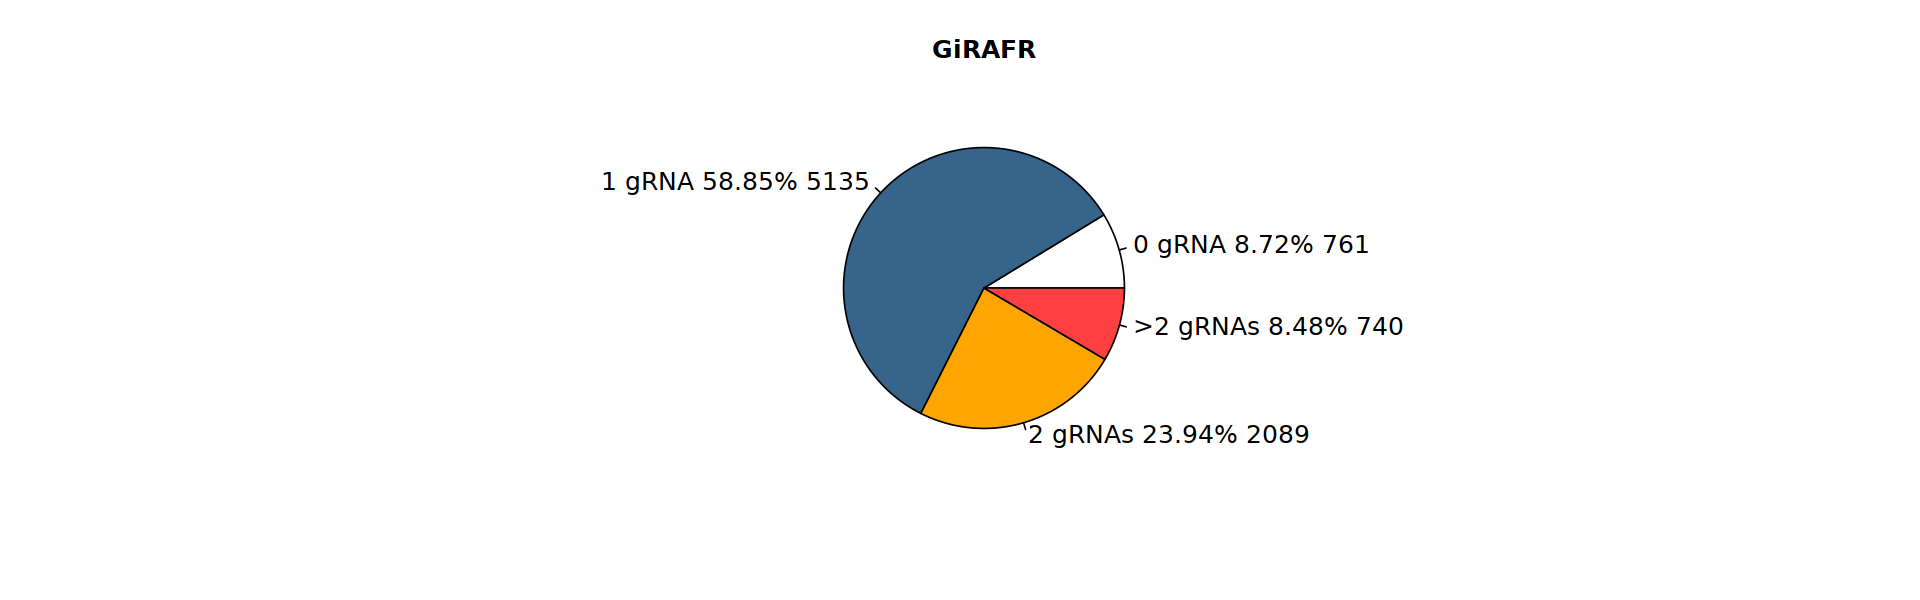

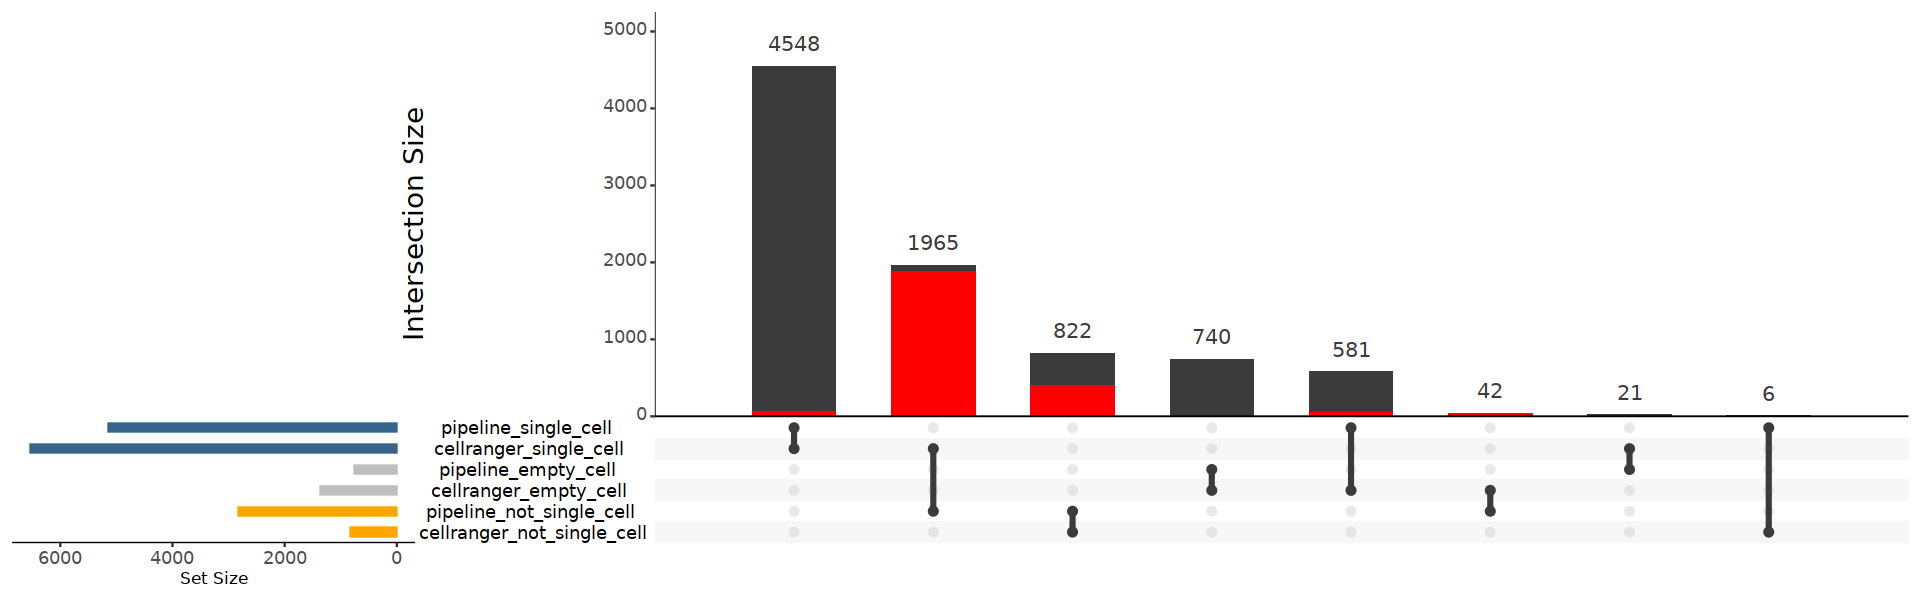

In [41]:
protospacer_file <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/feature_barcoding_analysis/sgRNAcs1/outs/crispr_analysis/protospacer_calls_per_cell.csv'
barcodes_file <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/feature_barcoding_analysis/sgRNAcs1/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
protospacer_calls_per_cell <-read.csv(protospacer_file, stringsAsFactors = FALSE)
cellranger_barcode <- read_csv(barcodes_file, col_names = FALSE)

save_pdf <- paste0(output_dir, '.compare_cell_number_TSO.pdf')
pdf(save_pdf, height = 8, width = 10)

pipeline_NotEmpty <- cells.num_features$cb
pipeline_Single <- cells.num_features$cb[which(cells.num_features$num_features == 1)]
par(mar = c(1,1,1,10))
slices1 <- c(nrow(cellranger_barcode) - sum(table(protospacer_calls_per_cell$num_features)),
        as.vector(table(protospacer_calls_per_cell$num_features)[1]),
        as.vector(table(protospacer_calls_per_cell$num_features)[2]),
        sum(table(protospacer_calls_per_cell$num_features)[-(1:2)]))
lbls1 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct1 <- round(slices1/sum(slices1)*100, digit =2 )
lbls1 <- paste(lbls1, pct1) # add percents to labels
lbls1 <- paste(lbls1,"%",sep="") # ad % to labels
lbls1 <- paste(lbls1, slices1, sep =' ')
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')

par(mar = c(5,1,1,10))
slices2 <- c(nrow(cellranger_barcode) - sum(table(cells.num_features$num_features)),
        as.vector(table(cells.num_features$num_features)[1]),
        as.vector(table(cells.num_features$num_features)[2]),
        sum(table(cells.num_features$num_features)[-(1:2)]))
lbls2 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct2 <- round(slices2/sum(slices2)*100, digit = 2)
lbls2 <- paste(lbls2, pct2) # add percents to labels
lbls2 <- paste(lbls2,"%",sep="") # ad % to labels
lbls2 <- paste(lbls2, slices2, sep =' ')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')

all_barcodes <- as.data.frame(cellranger_barcode)
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 0, 
                                            ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 1, 0))

all_barcodes$cellranger_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 1, 0)
all_barcodes$cellranger_empty_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 0, 1)
all_barcodes$cellranger_not_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 0, 
                                            ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT, by.x = 'X1', by.y = 'cb', all.x = TRUE)

#table(all_barcodes$pipeline_single_cell, all_barcodes$has_MT)
#table(all_barcodes$has_MT)

Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes, 
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('cellranger_not_single_cell','pipeline_not_single_cell',
           'cellranger_empty_cell','pipeline_empty_cell',
           'cellranger_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"), 
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))
print(p)
dev.off()
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')
p

In [42]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
  539    84 

# combine samples MT position

Warning message:
“Removed 34 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 34 rows containing non-finite values (`stat_count()`).”


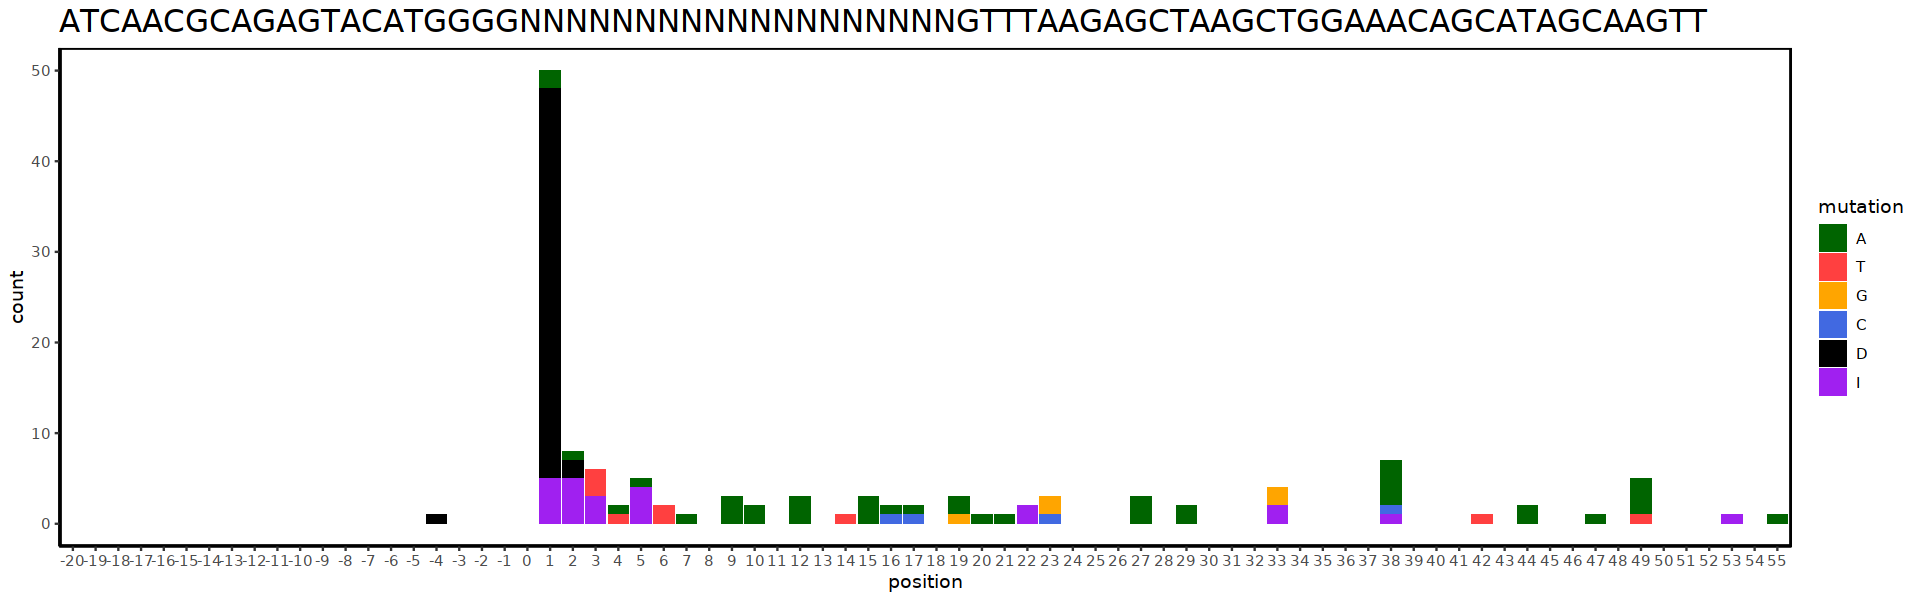

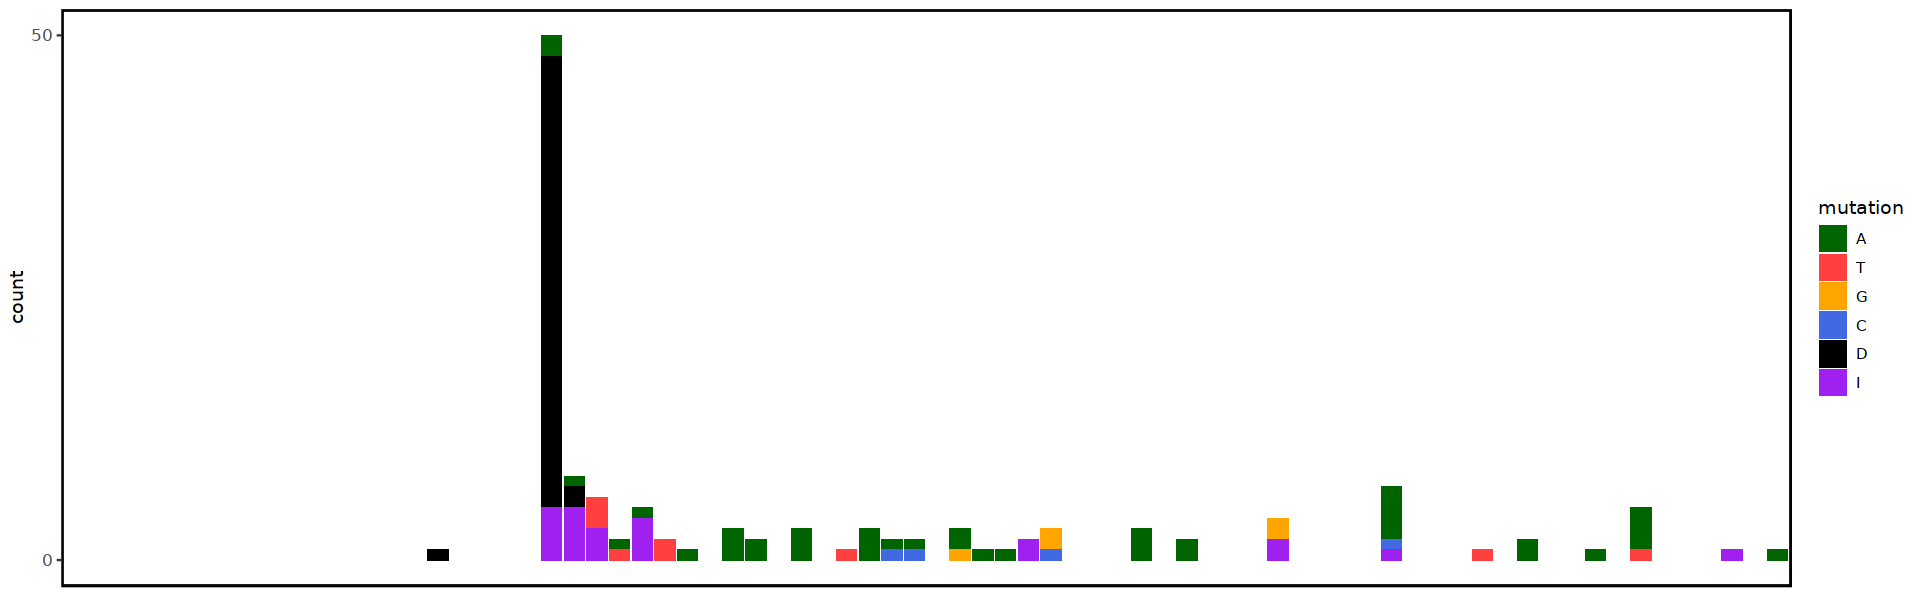

In [43]:
rm(list = ls())

my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')
input_dir = './GiRAFR_outputs/Replogle_NatureBiotechnology/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Replogle_NatureBiotechnology/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

#save_pdf <- paste0('./figures_results/Replogle_NatureBiotechnology/', 'Combined.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
options(repr.plot.width = 16, repr.plot.height = 5)
MT2 <- rbind(MT_sample1, MT_sample2)
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]
#########
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)
#########

MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))


ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar()+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar()+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      axis.text.y = element_text(size=10),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,max(table(MT2$position))))

#dev.off()

In [46]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /vsc-hard-mounts/leuven-data/334/vsc33470/miniconda3/envs/r4-base/lib/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] readr_2.1.2        dplyr_1.0.9        tidyr_1.2.0        ggpubr_0.4.0.999  
[5] sp_1.5-0           SeuratObject_4.1.0 Seurat_4.1.1       UpSetR_1.4.0      
[9] ggplot2_3.3.6     

loaded via a namespace (and not attached):
  [1] Rtsne_0.16            colorspace_2.0-3